In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Dataset - 1.csv')
df

,Patient ID,Age,Gender,Admission Date,Discharge Date,Diagnosis,Treatment Outcome,Readmission
0,1,62,Female,2023-03-18,2023-04-01,Pneumonia,Deteriorated,No
1,2,65,Male,2023-03-20,2023-03-26,Breast Cancer,Deteriorated,No
2,3,82,Female,2023-03-20,2023-03-21,Pneumonia,Recovered,No
3,4,85,Male,2023-03-13,2023-03-22,Heart Attack,Improved,No
4,5,85,Female,2023-03-27,2023-04-02,Appendicitis,No Change,No
...,...,...,...,...,...,...,...,...
95,96,53,Male,2023-03-07,2023-03-14,Appendicitis,Recovered,No
96,97,85,Female,2023-03-16,2023-03-24,Breast Cancer,No Change,No
97,98,64,Female,2023-03-01,2023-03-11,Fracture,Recovered,No
98,99,38,Female,2023-03-07,2023-03-09,Heart Attack,No Change,Yes


## Objective of the Project :- 
       To predict whether the patient will be readmitted or not based on the different clinical features

## EDA

In [3]:
# checking the data typpes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient ID         100 non-null    int64 
 1   Age                100 non-null    int64 
 2   Gender             100 non-null    object
 3   Admission Date     100 non-null    object
 4   Discharge Date     100 non-null    object
 5   Diagnosis          100 non-null    object
 6   Treatment Outcome  100 non-null    object
 7   Readmission        100 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.4+ KB


In [4]:
# Checking the Null Values
df.isnull().sum()

Patient ID           0
Age                  0
Gender               0
Admission Date       0
Discharge Date       0
Diagnosis            0
Treatment Outcome    0
Readmission          0
dtype: int64

#### In this data there is No Null Values

### Admission date and Discharge date are in object type hence we convert it into date time format

In [5]:
df['Admission Date']=pd.to_datetime(df['Admission Date'])
df['Discharge Date']=pd.to_datetime(df['Discharge Date'])

In [6]:
df

,Patient ID,Age,Gender,Admission Date,Discharge Date,Diagnosis,Treatment Outcome,Readmission
0,1,62,Female,2023-03-18,2023-04-01,Pneumonia,Deteriorated,No
1,2,65,Male,2023-03-20,2023-03-26,Breast Cancer,Deteriorated,No
2,3,82,Female,2023-03-20,2023-03-21,Pneumonia,Recovered,No
3,4,85,Male,2023-03-13,2023-03-22,Heart Attack,Improved,No
4,5,85,Female,2023-03-27,2023-04-02,Appendicitis,No Change,No
...,...,...,...,...,...,...,...,...
95,96,53,Male,2023-03-07,2023-03-14,Appendicitis,Recovered,No
96,97,85,Female,2023-03-16,2023-03-24,Breast Cancer,No Change,No
97,98,64,Female,2023-03-01,2023-03-11,Fracture,Recovered,No
98,99,38,Female,2023-03-07,2023-03-09,Heart Attack,No Change,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Patient ID         100 non-null    int64         
 1   Age                100 non-null    int64         
 2   Gender             100 non-null    object        
 3   Admission Date     100 non-null    datetime64[ns]
 4   Discharge Date     100 non-null    datetime64[ns]
 5   Diagnosis          100 non-null    object        
 6   Treatment Outcome  100 non-null    object        
 7   Readmission        100 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 6.4+ KB


In [8]:
df.describe()

,Patient ID,Age
count,100.000000,100.000000
mean,50.500000,52.430000
std,29.011492,20.375394
min,1.000000,18.000000
25%,25.750000,37.000000
50%,50.500000,53.000000
75%,75.250000,67.250000
max,100.000000,88.000000


In [9]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [10]:
df

,Patient ID,Age,Gender,Admission Date,Discharge Date,Diagnosis,Treatment Outcome,Readmission
0,1,62,1,2023-03-18,2023-04-01,Pneumonia,Deteriorated,No
1,2,65,0,2023-03-20,2023-03-26,Breast Cancer,Deteriorated,No
2,3,82,1,2023-03-20,2023-03-21,Pneumonia,Recovered,No
3,4,85,0,2023-03-13,2023-03-22,Heart Attack,Improved,No
4,5,85,1,2023-03-27,2023-04-02,Appendicitis,No Change,No
...,...,...,...,...,...,...,...,...
95,96,53,0,2023-03-07,2023-03-14,Appendicitis,Recovered,No
96,97,85,1,2023-03-16,2023-03-24,Breast Cancer,No Change,No
97,98,64,1,2023-03-01,2023-03-11,Fracture,Recovered,No
98,99,38,1,2023-03-07,2023-03-09,Heart Attack,No Change,Yes


In [11]:
df['Diagnosis'].value_counts() 

Breast Cancer    24
Heart Attack     20
Appendicitis     20
Pneumonia        19
Fracture         17
Name: Diagnosis, dtype: int64

####  Breast cancer is the most common condition among patients, followed by Heart Attacks and appendictis.

In [12]:
df['Treatment Outcome'].value_counts()

No Change       33
Recovered       30
Improved        21
Deteriorated    16
Name: Treatment Outcome, dtype: int64

#### Most Patients showed no change,while some patients are recoverd.

In [13]:
df['Readmission'].value_counts()

No     81
Yes    19
Name: Readmission, dtype: int64

#### This is the Imbalanced dataset

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

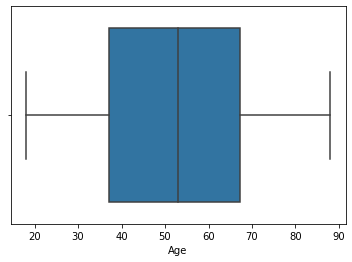

In [14]:
sns.boxplot(df['Age'])

#### There is no Outliers in Age Column

<AxesSubplot:xlabel='Age', ylabel='Density'>

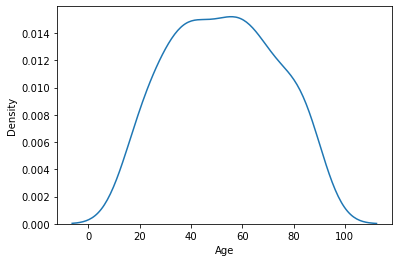

In [15]:
sns.kdeplot(df['Age'])

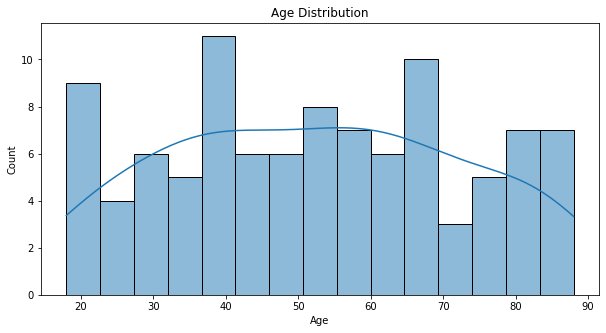

In [16]:
# Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],kde=True,bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

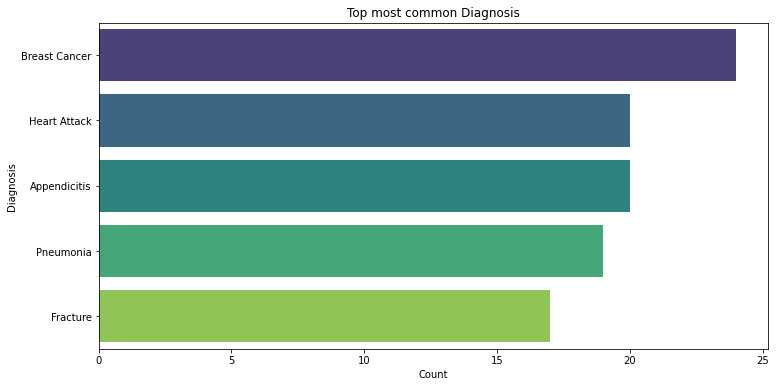

In [17]:
#Dignosis
plt.figure(figsize=(12,6))
sns.countplot(y=df['Diagnosis'],order=df['Diagnosis'].value_counts().index[:10],palette='viridis')
plt.title('Top most common Diagnosis')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.show()

In [18]:
df

,Patient ID,Age,Gender,Admission Date,Discharge Date,Diagnosis,Treatment Outcome,Readmission
0,1,62,1,2023-03-18,2023-04-01,Pneumonia,Deteriorated,No
1,2,65,0,2023-03-20,2023-03-26,Breast Cancer,Deteriorated,No
2,3,82,1,2023-03-20,2023-03-21,Pneumonia,Recovered,No
3,4,85,0,2023-03-13,2023-03-22,Heart Attack,Improved,No
4,5,85,1,2023-03-27,2023-04-02,Appendicitis,No Change,No
...,...,...,...,...,...,...,...,...
95,96,53,0,2023-03-07,2023-03-14,Appendicitis,Recovered,No
96,97,85,1,2023-03-16,2023-03-24,Breast Cancer,No Change,No
97,98,64,1,2023-03-01,2023-03-11,Fracture,Recovered,No
98,99,38,1,2023-03-07,2023-03-09,Heart Attack,No Change,Yes


In [19]:
df['Stay_Days']=df['Discharge Date']-df['Admission Date']
df['Stay_Days']=df['Stay_Days'].dt.days

#### Feature Engineering: Stay_Days

We created a new column `Stay_Days` by calculating the difference between the `Discharge Date` and the `Admission Date`. This feature represents the number of days a patient stayed in the hospital.


In [20]:
df

,Patient ID,Age,Gender,Admission Date,Discharge Date,Diagnosis,Treatment Outcome,Readmission,Stay_Days
0,1,62,1,2023-03-18,2023-04-01,Pneumonia,Deteriorated,No,14
1,2,65,0,2023-03-20,2023-03-26,Breast Cancer,Deteriorated,No,6
2,3,82,1,2023-03-20,2023-03-21,Pneumonia,Recovered,No,1
3,4,85,0,2023-03-13,2023-03-22,Heart Attack,Improved,No,9
4,5,85,1,2023-03-27,2023-04-02,Appendicitis,No Change,No,6
...,...,...,...,...,...,...,...,...,...
95,96,53,0,2023-03-07,2023-03-14,Appendicitis,Recovered,No,7
96,97,85,1,2023-03-16,2023-03-24,Breast Cancer,No Change,No,8
97,98,64,1,2023-03-01,2023-03-11,Fracture,Recovered,No,10
98,99,38,1,2023-03-07,2023-03-09,Heart Attack,No Change,Yes,2


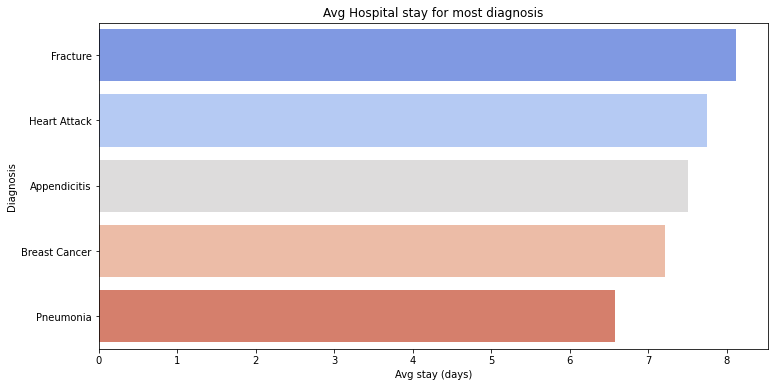

In [21]:
## Average no of days stay in the Hospital
Avg_stay=df.groupby("Diagnosis")["Stay_Days"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(y=Avg_stay.index[:10],x=Avg_stay.values[:10],palette="coolwarm")
plt.title('Avg Hospital stay for most diagnosis')
plt.xlabel("Avg stay (days)")
plt.ylabel('Diagnosis')
plt.show()

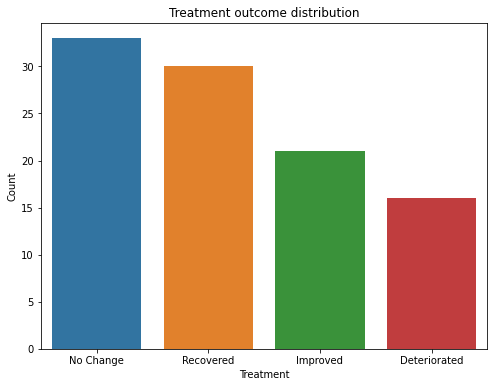

In [22]:
# Treatment Outcome Distribution
plt.figure(figsize=(8,6))
sns.countplot(x=df['Treatment Outcome'],order=df['Treatment Outcome'].value_counts().index,data=df)
plt.title('Treatment outcome distribution')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()

### Converting Categorical variable into Numerical Variable

In [23]:
df['Diagnosis'].value_counts()

Breast Cancer    24
Heart Attack     20
Appendicitis     20
Pneumonia        19
Fracture         17
Name: Diagnosis, dtype: int64

In [24]:
# with the use of one hot encoding weconverted categorical variable into numerical column
df_one_hot=pd.get_dummies(df,columns=['Diagnosis','Treatment Outcome'])

In [25]:
df_one_hot

,Patient ID,Age,Gender,Admission Date,Discharge Date,Readmission,Stay_Days,Diagnosis_Appendicitis,Diagnosis_Breast Cancer,Diagnosis_Fracture,Diagnosis_Heart Attack,Diagnosis_Pneumonia,Treatment Outcome_Deteriorated,Treatment Outcome_Improved,Treatment Outcome_No Change,Treatment Outcome_Recovered
0,1,62,1,2023-03-18,2023-04-01,No,14,0,0,0,0,1,1,0,0,0
1,2,65,0,2023-03-20,2023-03-26,No,6,0,1,0,0,0,1,0,0,0
2,3,82,1,2023-03-20,2023-03-21,No,1,0,0,0,0,1,0,0,0,1
3,4,85,0,2023-03-13,2023-03-22,No,9,0,0,0,1,0,0,1,0,0
4,5,85,1,2023-03-27,2023-04-02,No,6,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,53,0,2023-03-07,2023-03-14,No,7,1,0,0,0,0,0,0,0,1
96,97,85,1,2023-03-16,2023-03-24,No,8,0,1,0,0,0,0,0,1,0
97,98,64,1,2023-03-01,2023-03-11,No,10,0,0,1,0,0,0,0,0,1
98,99,38,1,2023-03-07,2023-03-09,Yes,2,0,0,0,1,0,0,0,1,0


In [26]:
df_one_hot['Readmission']=df['Readmission'].replace({'Yes':1,'No':0})

In [27]:
df_one_hot

,Patient ID,Age,Gender,Admission Date,Discharge Date,Readmission,Stay_Days,Diagnosis_Appendicitis,Diagnosis_Breast Cancer,Diagnosis_Fracture,Diagnosis_Heart Attack,Diagnosis_Pneumonia,Treatment Outcome_Deteriorated,Treatment Outcome_Improved,Treatment Outcome_No Change,Treatment Outcome_Recovered
0,1,62,1,2023-03-18,2023-04-01,0,14,0,0,0,0,1,1,0,0,0
1,2,65,0,2023-03-20,2023-03-26,0,6,0,1,0,0,0,1,0,0,0
2,3,82,1,2023-03-20,2023-03-21,0,1,0,0,0,0,1,0,0,0,1
3,4,85,0,2023-03-13,2023-03-22,0,9,0,0,0,1,0,0,1,0,0
4,5,85,1,2023-03-27,2023-04-02,0,6,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,53,0,2023-03-07,2023-03-14,0,7,1,0,0,0,0,0,0,0,1
96,97,85,1,2023-03-16,2023-03-24,0,8,0,1,0,0,0,0,0,1,0
97,98,64,1,2023-03-01,2023-03-11,0,10,0,0,1,0,0,0,0,0,1
98,99,38,1,2023-03-07,2023-03-09,1,2,0,0,0,1,0,0,0,1,0


In [28]:
df_one_hot

,Patient ID,Age,Gender,Admission Date,Discharge Date,Readmission,Stay_Days,Diagnosis_Appendicitis,Diagnosis_Breast Cancer,Diagnosis_Fracture,Diagnosis_Heart Attack,Diagnosis_Pneumonia,Treatment Outcome_Deteriorated,Treatment Outcome_Improved,Treatment Outcome_No Change,Treatment Outcome_Recovered
0,1,62,1,2023-03-18,2023-04-01,0,14,0,0,0,0,1,1,0,0,0
1,2,65,0,2023-03-20,2023-03-26,0,6,0,1,0,0,0,1,0,0,0
2,3,82,1,2023-03-20,2023-03-21,0,1,0,0,0,0,1,0,0,0,1
3,4,85,0,2023-03-13,2023-03-22,0,9,0,0,0,1,0,0,1,0,0
4,5,85,1,2023-03-27,2023-04-02,0,6,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,53,0,2023-03-07,2023-03-14,0,7,1,0,0,0,0,0,0,0,1
96,97,85,1,2023-03-16,2023-03-24,0,8,0,1,0,0,0,0,0,1,0
97,98,64,1,2023-03-01,2023-03-11,0,10,0,0,1,0,0,0,0,0,1
98,99,38,1,2023-03-07,2023-03-09,1,2,0,0,0,1,0,0,0,1,0


### Splitting the Data

In [29]:
df_one_hot.columns

Index(['Patient ID', 'Age', 'Gender', 'Admission Date', 'Discharge Date',
       'Readmission', 'Stay_Days', 'Diagnosis_Appendicitis',
       'Diagnosis_Breast Cancer', 'Diagnosis_Fracture',
       'Diagnosis_Heart Attack', 'Diagnosis_Pneumonia',
       'Treatment Outcome_Deteriorated', 'Treatment Outcome_Improved',
       'Treatment Outcome_No Change', 'Treatment Outcome_Recovered'],
      dtype='object')

In [30]:
x=df_one_hot.drop(['Patient ID','Admission Date','Discharge Date','Readmission'],axis=1)
y=df_one_hot['Readmission']

In [31]:
x

,Age,Gender,Stay_Days,Diagnosis_Appendicitis,Diagnosis_Breast Cancer,Diagnosis_Fracture,Diagnosis_Heart Attack,Diagnosis_Pneumonia,Treatment Outcome_Deteriorated,Treatment Outcome_Improved,Treatment Outcome_No Change,Treatment Outcome_Recovered
0,62,1,14,0,0,0,0,1,1,0,0,0
1,65,0,6,0,1,0,0,0,1,0,0,0
2,82,1,1,0,0,0,0,1,0,0,0,1
3,85,0,9,0,0,0,1,0,0,1,0,0
4,85,1,6,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,0,7,1,0,0,0,0,0,0,0,1
96,85,1,8,0,1,0,0,0,0,0,1,0
97,64,1,10,0,0,1,0,0,0,0,0,1
98,38,1,2,0,0,0,1,0,0,0,1,0


In [32]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    1
99    0
Name: Readmission, Length: 100, dtype: int64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Building

## Logistic Regression

In [34]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [35]:
#Evaluation for Training Model
y_pred_train=lg_model.predict(x_train)

acc_lg_train=accuracy_score(y_train,y_pred_train)
print('Accuracy for training model is: ',acc_lg_train)

conf_lg=confusion_matrix(y_train,y_pred_train)
print('Confusion matrix is: \n',conf_lg)

clas_lg=classification_report(y_train,y_pred_train)
print('classification report of training model is:\n ',clas_lg)

Accuracy for training model is:  0.825
Confusion matrix is: 
 [[62  1]
 [13  4]]
classification report of training model is:
                precision    recall  f1-score   support

           0       0.83      0.98      0.90        63
           1       0.80      0.24      0.36        17

    accuracy                           0.82        80
   macro avg       0.81      0.61      0.63        80
weighted avg       0.82      0.82      0.78        80



In [36]:
## Evaluation of Testing model
y_pred_test=lg_model.predict(x_test)

acc_lg_test=accuracy_score(y_test,y_pred_test)
print('Accuracy for testing model is: ',acc_lg_test)

conf=confusion_matrix(y_test,y_pred_test)
print('Confusion matrix is: \n',conf)

clas=classification_report(y_test,y_pred_test)
print('classification report of training model is: \n',clas)

Accuracy for testing model is:  0.9
Confusion matrix is: 
 [[18  0]
 [ 2  0]]
classification report of training model is: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Balancing the imbalance dataset with the help of SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote=SMOTE()

In [39]:
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)

In [40]:
y_train_resampled.value_counts()

0    63
1    63
Name: Readmission, dtype: int64

In [41]:
lg_model=LogisticRegression()
lg_model.fit(x_train_resampled,y_train_resampled)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
## Evalution of Training Model
y_pred_train=lg_model.predict(x_train_resampled)
acc_lgtrain=accuracy_score(y_train_resampled,y_pred_train)
print('Accuracy score is: ',acc_lgtrain)

conf=confusion_matrix(y_train_resampled,y_pred_train)
print('Confusion matrix is: \n',conf)

clas=classification_report(y_train_resampled,y_pred_train)
print('classification report of training model is:\n ',clas)

Accuracy score is:  0.8888888888888888
Confusion matrix is: 
 [[58  5]
 [ 9 54]]
classification report of training model is:
                precision    recall  f1-score   support

           0       0.87      0.92      0.89        63
           1       0.92      0.86      0.89        63

    accuracy                           0.89       126
   macro avg       0.89      0.89      0.89       126
weighted avg       0.89      0.89      0.89       126



In [43]:
## Evaluation of Testing model
y_pred_test=lg_model.predict(x_test)

acc_lgtest=accuracy_score(y_test,y_pred_test)
print('Accuracy for testing model is: ',acc_lgtest)

conf=confusion_matrix(y_test,y_pred_test)
print('Confusion matrix is: \n',conf)

clas=classification_report(y_test,y_pred_test)
print('classification report of training model is: \n',clas)

Accuracy for testing model is:  0.9
Confusion matrix is: 
 [[17  1]
 [ 1  1]]
classification report of training model is: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.50      0.50      0.50         2

    accuracy                           0.90        20
   macro avg       0.72      0.72      0.72        20
weighted avg       0.90      0.90      0.90        20



## Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier()

In [46]:
## Evalution of Training Model
y_pred_train=rf_model.predict(x_train_resampled)
acc=accuracy_score(y_train_resampled,y_pred_train)
print('Accuracy score is: ',acc)

conf=confusion_matrix(y_train_resampled,y_pred_train)
print('Confusion matrix is: \n',conf)

clas=classification_report(y_train_resampled,y_pred_train)
print('classification report of training model is:\n ',clas)

Accuracy score is:  1.0
Confusion matrix is: 
 [[63  0]
 [ 0 63]]
classification report of training model is:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        63

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [47]:
## Evaluation of Testing model
y_pred_test=rf_model.predict(x_test)

acc=accuracy_score(y_test,y_pred_test)
print('Accuracy for testing model is: ',acc)

conf=confusion_matrix(y_test,y_pred_test)
print('Confusion matrix is: \n',conf)

clas=classification_report(y_test,y_pred_test)
print('classification report of training model is: \n',clas)

Accuracy for testing model is:  0.75
Confusion matrix is: 
 [[14  4]
 [ 1  1]]
classification report of training model is: 
               precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.20      0.50      0.29         2

    accuracy                           0.75        20
   macro avg       0.57      0.64      0.57        20
weighted avg       0.86      0.75      0.79        20



#### Model Gets Overfitted so we are doing Hyper parameter Tunning

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
rf_model=RandomForestClassifier()
hyp={'n_estimators':np.arange(20,120),
     'criterion':['gini','entropy'],
     'max_depth':np.arange(2,10),
     'min_samples_split':np.arange(2,10),
     'min_samples_leaf':np.arange(3,15)}
rscv_model=RandomizedSearchCV(rf_model,hyp,cv=5)
rscv_model.fit(x_train_resampled,y_train_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119])})

In [50]:
rscv_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=97)

In [51]:
rf_model=rscv_model.best_estimator_
rf_model.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=97)

In [52]:
## Evalution of Training Model
y_pred_train=rf_model.predict(x_train_resampled)
acc_rf_train=accuracy_score(y_train_resampled,y_pred_train)
print('Accuracy score is: ',acc_rf_train)

conf=confusion_matrix(y_train_resampled,y_pred_train)
print('Confusion matrix is: \n',conf)

clas=classification_report(y_train_resampled,y_pred_train)
print('classification report of training model is:\n ',clas)

Accuracy score is:  0.9047619047619048
Confusion matrix is: 
 [[57  6]
 [ 6 57]]
classification report of training model is:
                precision    recall  f1-score   support

           0       0.90      0.90      0.90        63
           1       0.90      0.90      0.90        63

    accuracy                           0.90       126
   macro avg       0.90      0.90      0.90       126
weighted avg       0.90      0.90      0.90       126



In [53]:
## Evaluation of Testing model
y_pred_test=rf_model.predict(x_test)

acc_rf_test=accuracy_score(y_test,y_pred_test)
print('Accuracy for testing model is: ',acc_rf_test)

conf=confusion_matrix(y_test,y_pred_test)
print('Confusion matrix is: \n',conf)

clas=classification_report(y_test,y_pred_test)
print('classification report of training model is: \n',clas)

Accuracy for testing model is:  0.8
Confusion matrix is: 
 [[15  3]
 [ 1  1]]
classification report of training model is: 
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.25      0.50      0.33         2

    accuracy                           0.80        20
   macro avg       0.59      0.67      0.61        20
weighted avg       0.87      0.80      0.83        20



### Xg Boost Algorithm

In [54]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
import xgboost as xgb

In [56]:
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(x_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
## Evalution of Training Model
y_pred_train=xgb_clf.predict(x_train_resampled)
acc=accuracy_score(y_train_resampled,y_pred_train)
print('Accuracy score is: ',acc)

conf=confusion_matrix(y_train_resampled,y_pred_train)
print('Confusion matrix is: \n',conf)

clas=classification_report(y_train_resampled,y_pred_train)
print('classification report of training model is:\n ',clas)

Accuracy score is:  1.0
Confusion matrix is: 
 [[63  0]
 [ 0 63]]
classification report of training model is:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        63

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [58]:
## Evaluation of Testing model
y_pred_test=xgb_clf.predict(x_test)

acc=accuracy_score(y_test,y_pred_test)
print('Accuracy for testing model is: ',acc)

conf=confusion_matrix(y_test,y_pred_test)
print('Confusion matrix is: \n',conf)

clas=classification_report(y_test,y_pred_test)
print('classification report of training model is: \n',clas)

Accuracy for testing model is:  0.6
Confusion matrix is: 
 [[11  7]
 [ 1  1]]
classification report of training model is: 
               precision    recall  f1-score   support

           0       0.92      0.61      0.73        18
           1       0.12      0.50      0.20         2

    accuracy                           0.60        20
   macro avg       0.52      0.56      0.47        20
weighted avg       0.84      0.60      0.68        20



### Hyper parameter Tunning

In [59]:
xgb_clf=xgb.XGBClassifier()
hyp={'objective':['binary:logistic'],
     'max_depth':np.arange(3,9),             #Depth of tree
     'learning_rate':np.linspace(0.01,0.1),  #Step size for Each Tree
     'min_child_weight':np.arange(1,6),      #Minimum sum of weights for splitting
     'n_estimators':np.arange(100,200),      #Number of trees
     'gamma': np.linspace(0, 0.5, 5),        #Minimum loss reduction for splitting
     'subsample': np.linspace(0.5, 0.8),     #Percentage of data used per tree
     'colsample_bytree': np.linspace(0.5, 0.8, 5)}  #Percentage of features used per tree
rscv_model=RandomizedSearchCV(xgb_clf,hyp,cv=7)
rscv_model.fit(x_train_resampled,y_train_resampled)

RandomizedSearchCV(cv=7,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       0.59183673, 0.59795918, 0.60408163, 0.61020408, 0.61632653,
       0.62244898, 0.62857143, 0.63469388, 0.64081633, 0.64693878,
       0.65306122, 0.65918367, 0.66530612, 0.67142857, 0.67755102,
       0.68367347, 0.68979592, 0.69591837, 0.70204082, 0.70816327,
       0.71428571, 0.72040816, 0.72653061, 0.73265306, 0.73877551,
       0.74489796, 0.75102041, 0.75714286, 0.76326531, 0.76938776,
       0.7755102 , 0.78163265, 0.7877551 , 0.79387755, 0.8       ])})

In [60]:
rscv_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7250000000000001, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.09448979591836734, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=153, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
xgb_clf=rscv_model.best_estimator_
xgb_clf.fit(x_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7250000000000001, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.09448979591836734, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=153, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
## Evalution of Training Model
y_pred_train=xgb_clf.predict(x_train_resampled)
acc_xg_train=accuracy_score(y_train_resampled,y_pred_train)
print('Accuracy score is: ',acc_xg_train)

conf=confusion_matrix(y_train_resampled,y_pred_train)
print('Confusion matrix is: \n',conf)

clas=classification_report(y_train_resampled,y_pred_train)
print('classification report of training model is:\n ',clas)

Accuracy score is:  0.9444444444444444
Confusion matrix is: 
 [[63  0]
 [ 7 56]]
classification report of training model is:
                precision    recall  f1-score   support

           0       0.90      1.00      0.95        63
           1       1.00      0.89      0.94        63

    accuracy                           0.94       126
   macro avg       0.95      0.94      0.94       126
weighted avg       0.95      0.94      0.94       126



In [63]:
## Evaluation of Testing model
y_pred_test=xgb_clf.predict(x_test)

acc_xgb_test=accuracy_score(y_test,y_pred_test)
print('Accuracy for testing model is: ',acc_xgb_test)

conf=confusion_matrix(y_test,y_pred_test)
print('Confusion matrix is: \n',conf)

clas=classification_report(y_test,y_pred_test)
print('classification report of training model is: \n',clas)

Accuracy for testing model is:  0.65
Confusion matrix is: 
 [[12  6]
 [ 1  1]]
classification report of training model is: 
               precision    recall  f1-score   support

           0       0.92      0.67      0.77        18
           1       0.14      0.50      0.22         2

    accuracy                           0.65        20
   macro avg       0.53      0.58      0.50        20
weighted avg       0.85      0.65      0.72        20



### Saving The Model

In [64]:
import joblib 
def save_model(rf_model,model_path='model.pkl'):
    joblib.dump(rf_model,model_path)    

In [65]:
save_model(rf_model)

## Testing the Model

In [66]:
model=joblib.load('model.pkl')

In [67]:
df_one_hot.head(1)

,Patient ID,Age,Gender,Admission Date,Discharge Date,Readmission,Stay_Days,Diagnosis_Appendicitis,Diagnosis_Breast Cancer,Diagnosis_Fracture,Diagnosis_Heart Attack,Diagnosis_Pneumonia,Treatment Outcome_Deteriorated,Treatment Outcome_Improved,Treatment Outcome_No Change,Treatment Outcome_Recovered
0,1,62,1,2023-03-18,2023-04-01,0,14,0,0,0,0,1,1,0,0,0


In [68]:
new_data=pd.DataFrame({'Age':[62],
'Gender':[1],
'Stay_Days':[14], 
'Diagnosis_Appendicitis':[0],
'Diagnosis_Breast Cancer':[0],
'Diagnosis_Fracture':[0],                       
'Diagnosis_Heart Attack':[0],
'Diagnosis_Pneumonia':[1],
'Treatment Outcome_Deteriorated':[1],
'Treatment Outcome_Improved':[0],
'Treatment Outcome_No Change':[0],
'Treatment Outcome_Recovered':[0]})

In [69]:
prediction=rf_model.predict(new_data)
print(prediction)
if prediction==0:
    print('There is no readmission in Hospital')
else:
    print('There is readmission in Hospital')

[0]
There is no readmission in Hospital
